### question a
#### imports, load data, and preprocessing

In [1]:
# import library
import os.path  ##OS library
import gzip    ##Operate the compressed package
import pickle
import os
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
import math

In [2]:
## Dictionary
### tags and corresponding files
url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz',
}

## Download to current directory
dataset_dir = os.path.dirname('./')

## The folder needs to be downloaded to which directory
save_file = dataset_dir + "/mnist.pkl"

## Dataset Information
train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784

In [3]:
## Download function
def _download(file_name):
    file_path = dataset_dir + "/" + file_name ##The path where the file is located

    if os.path.exists(file_path):            ##Check if the path exists
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name,file_path)   ## Download path, file's name, file's directory
    print("Done")

In [4]:
## Map the compressed package to each tag('train_img','train_label','test_img','test_label') and download.('key_file')
def download_mnist():
    for v in key_file.values():   
       _download(v)

In [5]:
## Download the label
### Similar with download function
def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name   ##The path where the file is located

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)  ## open the gz file and read it, save as uint8, offset=8 (convert)
    print("Done")

    return labels
## return labels

In [6]:
## Load image
### Similar with previous function
def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)   ## reshape data size
    print("Done")

    return data
## return data

In [7]:
def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])  ##train-images-idx3-ubyte.gz
    dataset['train_label'] = _load_label(key_file['train_label'])  ##'train-labels-idx1-ubyte.gz'
    dataset['test_img'] = _load_img(key_file['test_img'])     ##'t10k-images-idx3-ubyte.gz'
    dataset['test_label'] = _load_label(key_file['test_label'])   ##'t10k-labels-idx1-ubyte.gz'
                   
    return dataset

In [8]:
## Initialization
def init_mnist():
    download_mnist()           ## download data
    dataset = _convert_numpy()  ##convert deta
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

In [9]:
##  Convert to 0,1 two labels
def change_label(X):
    row,col = X.shape
    T = np.zeros((row, col))
    for i in range(row):
        for j in range(col):
            r = X[i][j]//5
            T[i][j] = r
    return T

In [10]:
## Judgment normalization，flatten and one-hot state.
def load_mnist(normalize=True, flatten=True, binary_label=True):

    if not os.path.exists(save_file):
        init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if binary_label:
        #print(dataset['train_label'][:,None].shape)
        dataset['train_label'] = change_label(dataset['train_label'][:,None])
        dataset['test_label'] = change_label(dataset['test_label'][:,None])

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])

In [11]:
init_mnist()

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [12]:
(train_image, train_label), (test_x, test_y)=load_mnist()
print("train image shape", train_image.shape)
print("train label shape", train_label.shape)
print("test image shape", test_x.shape)
print("test label shape", test_y.shape)

train image shape (60000, 784)
train label shape (60000, 1)
test image shape (10000, 784)
test label shape (10000, 1)


In [13]:
#create reainning set and validation set
train_x = train_image[0:50000]
validation_x = train_image[50000:60000]
train_y = train_label[0:50000]
validation_y= train_label[50000:60000]

print("train set shape", train_x.shape)
print("train label shape", train_y.shape)
print("validation image shape", validation_x.shape)
print("validation label shape", validation_y.shape)
print("test image shape", test_x.shape)
print("test label shape", test_y.shape)

train set shape (50000, 784)
train label shape (50000, 1)
validation image shape (10000, 784)
validation label shape (10000, 1)
test image shape (10000, 784)
test label shape (10000, 1)


In [14]:
# z-normalize data
# normalize train set
train_x_std = np.std(train_x)
train_x = np.nan_to_num((train_x - np.mean(train_x,axis=0))/train_x_std) 
#print(np.mean(train_x))
#print(np.std(train_x))

# normalize test set
test_x_std = np.std(test_x)
test_x = np.nan_to_num((test_x - np.mean(test_x,axis=0))/test_x_std) 

# normalize validation set
validation_x_std = np.std(validation_x)
validation_x = np.nan_to_num((validation_x - np.mean(validation_x,axis=0))/validation_x_std) 

In [15]:
# concatenate 1 to the end
c = np.array([[1 for i in range(50000)]])
ct = np.array([[1 for i in range(10000)]])
cv = np.array([[1 for i in range(10000)]])
train_x = np.concatenate((train_x, c.T), axis=1)
test_x = np.concatenate((test_x, ct.T), axis=1)
validation_x = np.concatenate((validation_x, cv.T), axis=1)

In [16]:
print("train set shape", train_x.shape)
print("test image shape", test_x.shape)
print("validation image shape", validation_x.shape)

train set shape (50000, 785)
test image shape (10000, 785)
validation image shape (10000, 785)


### question 2
#### linear classifier, no middle layer，so v is the same as w.

In [17]:
# minibatch sgd
def minibatch_SGD(B, itrs, eta, train_x, train_y, test_x, test_y):
    loss = []
    cal_itr = []
    correspond_acc = []
    itr_batch = itrs//100
    W = np.zeros((785,1), dtype=np.float32)
    for i in range(itrs):
        if i % itr_batch == 0:
            cal_itr.append(i)
            correspond_acc.append(test(W,validation_x,validation_y))
        # select batch
        r = np.random.choice(train_x.shape[0], size=B, replace=True)
        X = train_x[r]
        Y = train_y[r]
        #print(X.shape)
        #print(Y.shape)
        g = X.T.dot(X.dot(W)) - X.T.dot(Y) ##gradient
        g = 1/B*g
        W = W-eta*(g)
        loss.append(0.5*(np.linalg.norm(Y - X.dot(W))**2)/B)
         
    return W,loss,cal_itr,correspond_acc

def test(W,test_x,test_y):
    count = 0 
    y_hat = test_x@W
#     for i in range (test_x.shape[0]):
#         y_hat = np.argmax(test_x@W, axis=1)
#         ((np.argmax(test_x@W, axis=1) == np.argmax(test_y,axis=1)).sum() /test_y.shape[0])
#         corr = y_hat == np.argmax(test_y,axis=1).

    for i in range(test_x.shape[0]):
        if np.around(y_hat[i]) == test_y[i]:
            count += 1
    acc = count / test_y.shape[0]
    print('test accuracy:',acc)
    return acc

In [18]:
def plot_acc(cal_itr,correspond_acc):
    plt.title("Test Accuracy VS Iteration")
    plt.ylabel('Accuracy')
    plt.xlabel('Iterations') 
    plt.plot(cal_itr,correspond_acc,linewidth=0.5, color = 'blue')
    plt.show()

In [19]:
def plot_curve(loss_curve):
    plt.title("Training Loss VS Iteration")
    plt.ylabel('Training Loss')
    plt.xlabel('Iterations')
    plt.plot(loss_curve, linewidth=0.5, color = 'red')
    plt.show()

test accuracy: 0.5058
test accuracy: 0.5052
test accuracy: 0.5141
test accuracy: 0.5357
test accuracy: 0.5537
test accuracy: 0.5873
test accuracy: 0.6046
test accuracy: 0.6296
test accuracy: 0.6477
test accuracy: 0.6685
test accuracy: 0.6823
test accuracy: 0.6932
test accuracy: 0.7052
test accuracy: 0.7165
test accuracy: 0.7294
test accuracy: 0.7365
test accuracy: 0.7508
test accuracy: 0.754
test accuracy: 0.7613
test accuracy: 0.7748
test accuracy: 0.7841
test accuracy: 0.7913
test accuracy: 0.7931
test accuracy: 0.7995
test accuracy: 0.8051
test accuracy: 0.8087
test accuracy: 0.8133
test accuracy: 0.8176
test accuracy: 0.8207
test accuracy: 0.8227
test accuracy: 0.8249
test accuracy: 0.8278
test accuracy: 0.8323
test accuracy: 0.8342
test accuracy: 0.8382
test accuracy: 0.8396
test accuracy: 0.8434
test accuracy: 0.8441
test accuracy: 0.8454
test accuracy: 0.8456
test accuracy: 0.8467
test accuracy: 0.8482
test accuracy: 0.8498
test accuracy: 0.8513
test accuracy: 0.8509
test accura

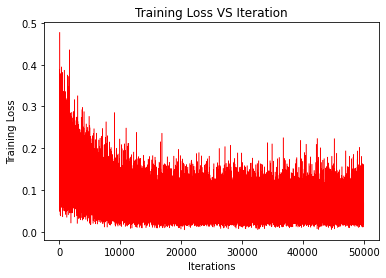

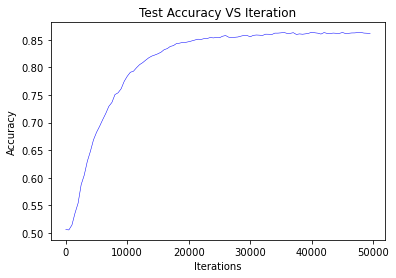

In [20]:
## B=1,Iteration=100, learning rate(eta)=0.0001
start_time = time.time()
(W,loss,cal_itr,correspond_acc) = minibatch_SGD(10,50000,0.0001,train_x, train_y, test_x, test_y) 
print("--- %s seconds ---" % (time.time() - start_time)) 
## print(loss)
plot_curve(loss)
plot_acc(cal_itr,correspond_acc)         

### Question 3
#### Indentity activation + Quadratic loss

In [21]:
# ReLU activation
def relu(x):
    return np.maximum(0,x)

In [22]:
#ReLU derivative fuction
def reluDerivative(x):
    y = x.copy()
    y[y<=0] = 0
    y[y>0] = 1
    return y

In [23]:
# f(x) predict
def predict_quadratic(v,W,x):
    return ((v.T).dot(relu(W.dot(x.T)))).T ##output size = B*1

In [24]:
def quadratic_grad(v,W,x,y):
    yh = predict_quadratic(v,W,x)
    r = yh - y
    h = relu(W.dot(x.T))
    grad_v = h[:,None].dot(r[:,None]) # #partial Loss/patial v #size k*1
    h_derivative = reluDerivative(W.dot(x.T))
    grad_W = (r[:,None] * v * h_derivative[:,None]).dot(x[None,:])
    #print(grad_W.shape)
    return grad_W,grad_v

def quadratic_loss(v,W,x,y):
   # print(x.shape)
   # print(y.shape)
   # print(predict_quadratic(v,W,x).shape)
    return np.linalg.norm(y-predict_quadratic(v,W,x))**2

In [25]:
# minibatch sgd
def nn_SGD(k, train_x, train_y, test_x, test_y):
    d = 785  # Input dimension.
    itrs = 50000
    W_QL = np.random.normal(0, 1/d, ((k,d))) 
    v_QL = np.random.normal(0, 1/k, ((k,1)))
    B = 10      #batch size
    eta = 0.001 #learning rate
    loss_curve = []
    cal_itr = []
    correspond_acc = []
    itr_batch = itrs//10
    for i in range(itrs):
        
        if i % itr_batch == 0:
            cal_itr.append(i)
            correspond_acc.append(test(v_QL,W_QL,validation_x,validation_y)) ##test validation
        
        grad_v=np.zeros((k,1))   #initialize v
        grad_W=np.zeros((k,d))   #initialize W
            
        r = np.random.choice(train_x.shape[0], size=B, replace=True)   #mini batch 
        X = train_x[r]
        Y = train_y[r]
        
        #print(X.shape)
        #print(v_QL.shape)
        #print(W_QL.shape)       
        
        for j in range(B):
            gw,gv = quadratic_grad(v_QL,W_QL,X[j],Y[j]) ##??
            #grad_w+=gw
            grad_v+=gv
            grad_W+=gw
        v_QL-=eta*grad_v/B  #update V
        W_QL-=eta*grad_W/B  #update W
        
        loss_curve.append(0.5*(quadratic_loss(v_QL,W_QL,X,Y)/B))
        #print('Normalized Loss:',0.5*(quadratic_loss(v_QL,W_QL,X,Y)/B))
    return v_QL,W_QL,loss_curve,cal_itr,correspond_acc
        
def test(v_QL,W_QL,test_x,test_y):
    
    count = 0 
    y_hat = predict_quadratic(v_QL,W_QL,test_x) #??
#     for i in range (test_x.shape[0]):
#         y_hat = np.argmax(test_x@W, axis=1)
#         ((np.argmax(test_x@W, axis=1) == np.argmax(test_y,axis=1)).sum() /test_y.shape[0])
#         corr = y_hat == np.argmax(test_y,axis=1).
   
    for i in range(test_x.shape[0]):
        if np.around(y_hat[i]) == test_y[i]:
            count += 1
    acc = count / test_y.shape[0] 
    print('test accuracy:',acc)
    return acc    

In [26]:
def plot_curve(loss_curve):
    plt.title("Training Loss VS Iteration")
    plt.ylabel('Training Loss')
    plt.xlabel('Iterations')
    plt.plot(loss_curve, linewidth=0.5, color = 'red')
    plt.grid(True)
    plt.show()

In [27]:
def plot_acc(cal_itr,correspond_acc):
    plt.title("Test Accuracy VS Iteration")
    plt.ylabel('Accuracy')
    plt.xlabel('Iterations') 
    plt.plot(cal_itr,correspond_acc,linewidth=0.5, color = 'blue')
    plt.grid(True)
    plt.show()

test accuracy: 0.5058
test accuracy: 0.868
test accuracy: 0.9048
test accuracy: 0.9191
test accuracy: 0.9262
test accuracy: 0.9302
test accuracy: 0.9335
test accuracy: 0.9349
test accuracy: 0.9371
test accuracy: 0.9393
--- 17.82186007499695 seconds ---


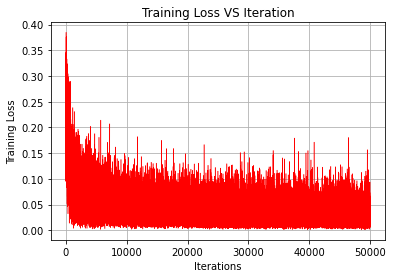

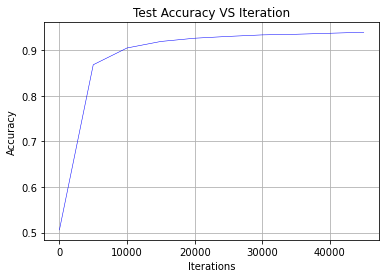

In [28]:
start_time = time.time()
(v_QL,W_QL,loss_curve,cal_itr,correspond_acc) = nn_SGD(5,train_x, train_y, test_x, test_y) 
print("--- %s seconds ---" % (time.time() - start_time)) 
## print(loss)
plot_curve(loss_curve)
plot_acc(cal_itr,correspond_acc)

test accuracy: 0.5058
test accuracy: 0.8966
test accuracy: 0.9197
test accuracy: 0.9327
test accuracy: 0.9434
test accuracy: 0.951
test accuracy: 0.9555
test accuracy: 0.9595
test accuracy: 0.9635
test accuracy: 0.9647
--- 126.243004322052 seconds ---


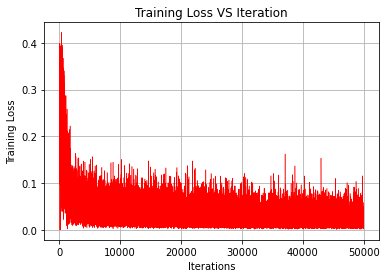

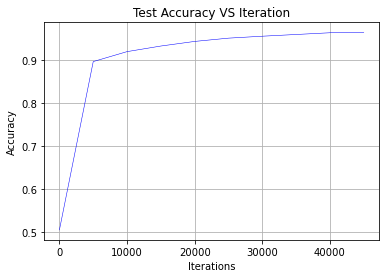

In [29]:
start_time = time.time()
(v_QL,W_QL,loss_curve,cal_itr,correspond_acc) = nn_SGD(40,train_x, train_y, test_x, test_y) 
print("--- %s seconds ---" % (time.time() - start_time)) 
## print(loss)
plot_curve(loss_curve)
plot_acc(cal_itr,correspond_acc)

test accuracy: 0.5058
test accuracy: 0.8951
test accuracy: 0.9201
test accuracy: 0.9338
test accuracy: 0.9422
test accuracy: 0.9514
test accuracy: 0.9569
test accuracy: 0.9588
test accuracy: 0.9624
test accuracy: 0.9656
--- 455.7170567512512 seconds ---


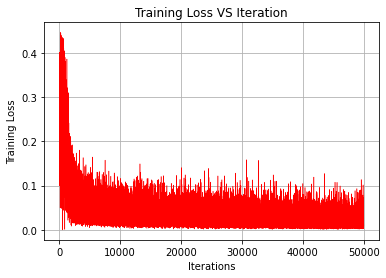

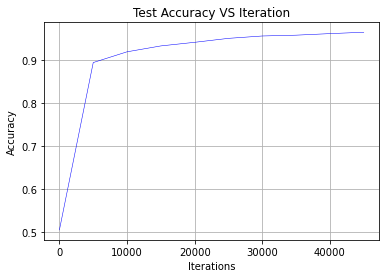

In [30]:
start_time = time.time()
(v_QL,W_QL,loss_curve,cal_itr,correspond_acc) = nn_SGD(200,train_x, train_y, test_x, test_y) 
print("--- %s seconds ---" % (time.time() - start_time)) 
## print(loss)
plot_curve(loss_curve)
plot_acc(cal_itr,correspond_acc)

### question 4
#### Sigmoid activation + logistic loss

In [31]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [32]:
def derivative_sigmoid(x):
    return (sigmoid(x) * (1.0 - sigmoid(x)))

In [33]:
#ReLU derivative fuction
def reluDerivative(x):
    y = x.copy()
    y[y<=0] = 0
    y[y>0] = 1
    return y

In [34]:
##y_hat
def predict_logistic(v,W,x):
        return 1/(1+math.e**-((v.T).dot(relu(W.dot(x.T))))).T

In [35]:
def logistic_grad(v,W,x,y):
    H = relu(W.dot(x.T))
    f = ((v.T).dot(relu(W.dot(x.T)))).T
    est_f = predict_logistic(v,W,x) ## y_hat
    res = est_f - y  ##(y_hat-y)
    #print(res.shape)
    H_de = derivative_sigmoid(f)
    grad_V = H[:,None].dot(res[:,None])*H_de #size 5*1
    H_derivative = reluDerivative(W.dot(x.T))
    grad_w = (res[:,None] * v * H_de * H_derivative[:,None]).dot(x[None,:]) #size 5*785
    #print(f.shape)
    return grad_V,grad_w

def logistic_loss(v,W,x,y):
    Y_hat = predict_logistic(v,W,x) #B*1
    #print(Y_hat.shape)
    return -np.mean(y*(np.log(Y_hat))+(1-y)*np.log(1-Y_hat))

In [36]:
## minibatch sgd
def SGD(k, train_x, train_y, test_x, test_y):
    d = 785  # Input dimension.
    itrs = 50000
    W_LL = np.random.normal(0, 1/d, ((k,d))) 
    v_LL = np.random.normal(0, 1/k, ((k,1)))
    B = 10      #batch size
    eta = 0.001 #learning rate
    Loss_curve = []
    cal_itr = []
    correspond_accuracy = []
    itr_batch = itrs//10
    for i in range(itrs):
        
        if i % itr_batch == 0:
            cal_itr.append(i)
            correspond_accuracy.append(test(v_LL,W_LL,validation_x,validation_y)) ##test validation
        
        grad_V = np.zeros((k,1))   #initialize v
        grad_w = np.zeros((k,d))   #initialize W
            
        r = np.random.choice(train_x.shape[0], size=B, replace=True)   #mini batch 
        X = train_x[r]
        Y = train_y[r]
      
        for j in range(B):
            (GV,GW) = logistic_grad(v_LL,W_LL,X[j],Y[j]) 
            #print(grad_V.shape) 
            #print(grad_w.shape)
            #print(GV.shape)
            #print(GW.shape)
            grad_V += GV #size 5*1
            grad_w += GW #size 5*785
        v_LL -= eta*grad_V/B  #update v
        W_LL -= eta*grad_w/B  #update W
        #print(v_LL.shape) #5*1
        #print(W_LL.shape) #5*785
        #print(X.shape)  #B*587
        #print(Y.shape)  #B*1
        
        Loss_curve.append(logistic_loss(v_LL,W_LL,X,Y))
        #print('Loss:',logistic_loss(v_LL,W_LL,X,Y))
        #print(Loss_curve.shape)
        
    return v_LL,W_LL,Loss_curve,cal_itr,correspond_accuracy

def test(v_LL,W_LL,test_x,test_y):
    
    count = 0 
    YH = predict_logistic(v_LL,W_LL,test_x) 
#     for i in range (test_x.shape[0]):
#         y_hat = np.argmax(test_x@W, axis=1)
#         ((np.argmax(test_x@W, axis=1) == np.argmax(test_y,axis=1)).sum() /test_y.shape[0])
#         corr = y_hat == np.argmax(test_y,axis=1).
   
    for i in range(test_x.shape[0]):
        if np.around(YH[i]) == test_y[i]:
            count += 1
    accuracy = count / test_y.shape[0] 
    print('test accuracy:',accuracy)
    return accuracy     

In [37]:
def plot_curve(loss_curve):
    plt.title("Training Loss VS Iteration")
    plt.ylabel('Training Loss')
    plt.xlabel('Iterations')
    plt.plot(Loss_curve, linewidth=0.5, color = 'red')
    plt.grid(True)
    plt.show()

In [38]:
def plot_acc(cal_itr,correspond_accuracy):
    plt.title("Test Accuracy VS Iteration")
    plt.ylabel('Accuracy')
    plt.xlabel('Iterations') 
    plt.plot(cal_itr,correspond_accuracy,linewidth=0.5, color = 'blue')
    plt.grid(True)
    plt.show()

##### K=5

test accuracy: 0.4863
test accuracy: 0.7901
test accuracy: 0.8159
test accuracy: 0.8444
test accuracy: 0.8659
test accuracy: 0.8763
test accuracy: 0.894
test accuracy: 0.907
test accuracy: 0.9155
test accuracy: 0.9197
--- 27.15716862678528 seconds ---


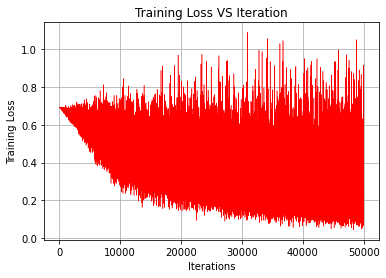

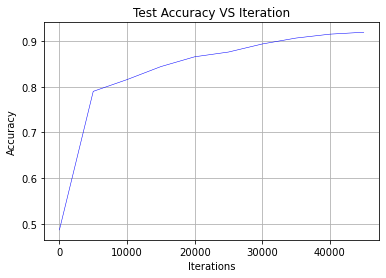

In [42]:
start_time = time.time()
(v_LL,W_LL,loss_curve,cal_itr,correspond_accuracy) = SGD(5,train_x, train_y, test_x, test_y) 
print("--- %s seconds ---" % (time.time() - start_time)) 
## print(loss)
plot_curve(loss_curve)
plot_acc(cal_itr,correspond_accuracy)

###### K=40

test accuracy: 0.5427
test accuracy: 0.7693
test accuracy: 0.7815
test accuracy: 0.8136
test accuracy: 0.8474
test accuracy: 0.8747
test accuracy: 0.893
test accuracy: 0.9099
test accuracy: 0.9194
test accuracy: 0.9262
--- 169.67136669158936 seconds ---


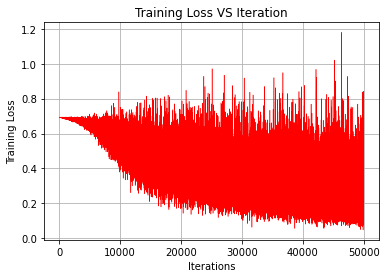

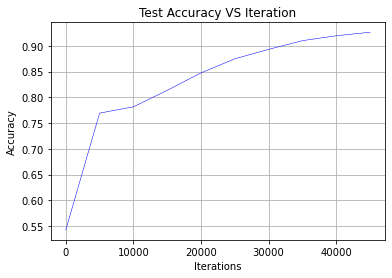

In [43]:
start_time = time.time()
(v_LL,W_LL,loss_curve,cal_itr,correspond_accuracy) = SGD(40,train_x, train_y, test_x, test_y) 
print("--- %s seconds ---" % (time.time() - start_time)) 
## print(loss)
plot_curve(loss_curve)
plot_acc(cal_itr,correspond_accuracy)

##### K=200

test accuracy: 0.5371
test accuracy: 0.7616
test accuracy: 0.764
test accuracy: 0.7838
test accuracy: 0.8225
test accuracy: 0.8529
test accuracy: 0.8775
test accuracy: 0.9
test accuracy: 0.9154
test accuracy: 0.9242
--- 531.8118321895599 seconds ---


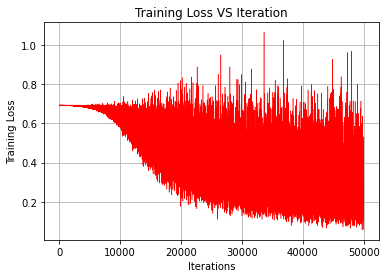

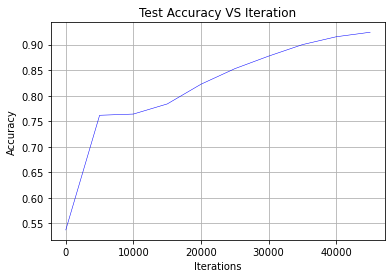

In [44]:
start_time = time.time()
(v_LL,W_LL,loss_curve,cal_itr,correspond_accuracy) = SGD(200,train_x, train_y, test_x, test_y) 
print("--- %s seconds ---" % (time.time() - start_time)) 
## print(loss)
plot_curve(loss_curve)
plot_acc(cal_itr,correspond_accuracy)